# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     2.936605e+01     7.086116e+00
 * time: 0.005920886993408203
     1     2.650111e+01     5.801641e+00
 * time: 0.016983985900878906
     2     1.927863e+01     4.125111e+00
 * time: 0.04317593574523926
     3     1.830622e+01     5.024922e+00
 * time: 0.19350099563598633
     4     1.249139e+01     1.727753e+00
 * time: 0.2193620204925537
     5     1.122254e+01     9.439946e-01
 * time: 0.24430298805236816
     6     1.038124e+01     1.810424e+00
 * time: 0.26407790184020996
     7     9.785957e+00     8.948668e-01
 * time: 0.2843170166015625
     8     9.462104e+00     6.803396e-01
 * time: 0.30748987197875977
     9     9.191112e+00     5.969125e-01
 * time: 0.3308219909667969
    10     8.962184e+00     9.275653e-01
 * time: 0.3556530475616455
    11     8.764431e+00     5.365031e-01
 * time: 0.38141298294067383
    12     8.646003e+00     7.864183e-01
 * time: 0.398482084274292
    13     8.574012e+00     6.327023e-01
 * time: 0.4

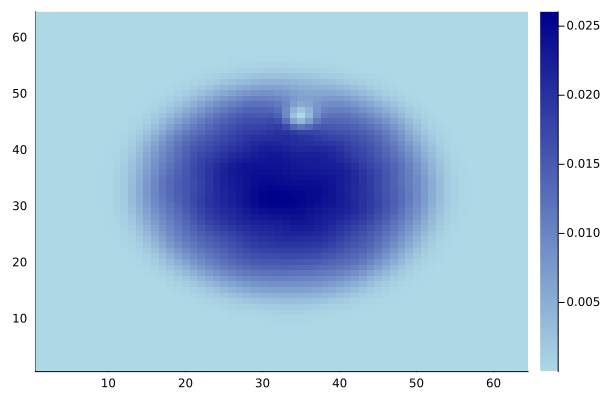

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)